In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import pickle
import json
import warnings
import datetime
warnings.filterwarnings('ignore')
#plt.style.use('ggplot')
% matplotlib inline

In [34]:
from model_generator_timeseries import *

### Load models, parameters and df

In [35]:
model = pickle.load(open('saved_models/stack_pipeline.p', 'rb'))
features_list_stack = json.load(open('json/feature_list_band_stack.json', 'r'))
arima_parameters = json.load(open('json/arima_band_parameters_stack_model.json', 'r'))
ar_param = arima_parameters['ar']
std_innovations = arima_parameters['std']
paths_dict_band = json.load(open('inputs_json/paths_dict_band.json', 'r'))

In [36]:
stack_validation = pd.read_json('json/stack_validation_day.json', orient='index')

### Check prediction for last day

In [37]:
stacked_20170317 = forecast_2017_samples(df=stack_validation, feature_list=features_list_stack,
                                        output='band', fitted_model=model,
                                        ar_param=ar_param, ar_order=[24, 25], 
                                        ma_param=[], ma_order=[],
                                        std=std_innovations)

In [38]:
stacked_pred = stacked_20170317.get_2017_predictions_from_base_model()

MAE: 1.5418, MSE: 3.5646


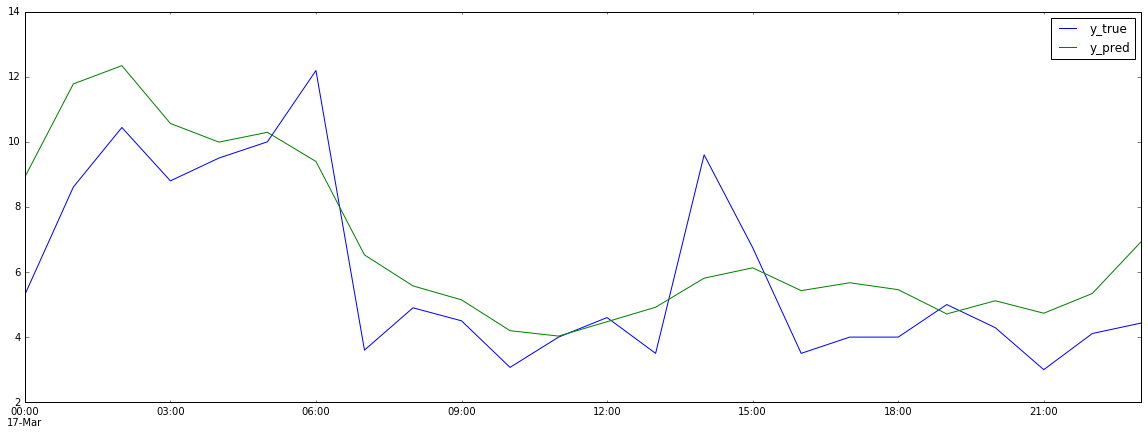

In [39]:
stacked_pred[['y_true', 'y_pred']].plot(figsize=(20,7));

In [44]:
stacked_pred

,y_pred,y_true,error
2017-03-17 00:00:00,8.916652,5.30,-3.616652
2017-03-17 01:00:00,11.778097,8.61,-3.168097
2017-03-17 02:00:00,12.339289,10.44,-1.899289
2017-03-17 03:00:00,10.563443,8.80,-1.763443
2017-03-17 04:00:00,9.990388,9.50,-0.490388
2017-03-17 05:00:00,10.291815,10.00,-0.291815
2017-03-17 06:00:00,9.395106,12.19,2.794894
2017-03-17 07:00:00,6.525415,3.60,-2.925415
2017-03-17 08:00:00,5.572692,4.90,-0.672692
2017-03-17 09:00:00,5.144528,4.50,-0.644528


### AR effect
$$S_{t} = f(X_{t})e^{Z_{t}} \\$$

$$Z_{t} = \alpha_{24} \cdot Z_{t-24}  + \alpha_{25} \cdot Z_{t-25} + \epsilon _{t}$$

$$S_{t} = f(x)e^{(\alpha_{24} \cdot Z_{t-24}  + \alpha_{25} \cdot Z_{t-25} + \epsilon _{t})}$$

##### Example without white noise

In [40]:
model_stacked_arima = stacked_20170317.get_2017_predictions_arima_effect()

MAE: 1.5418, MSE: 3.5646


In [45]:
np.random.seed(0)
model_stacked_arima_noise = stacked_20170317.get_2017_predictions_with_noise()

MAE: 3.3083, MSE: 21.3630


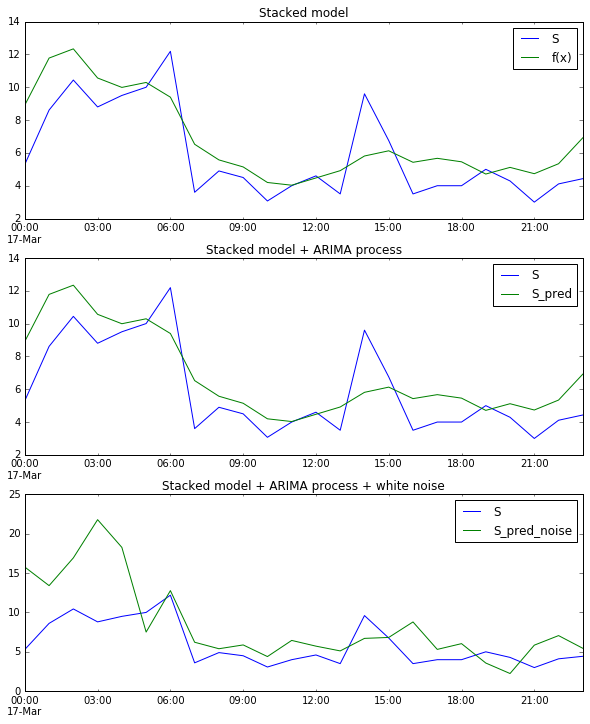

In [48]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(10,12))
model_stacked_arima_noise[['S', 'f(x)']].plot(ax=ax0)
ax0.set_title('Stacked model')
model_stacked_arima_noise[['S', 'S_pred']].plot(ax=ax1)
ax1.set_title('Stacked model + ARIMA process')
model_stacked_arima_noise[['S', 'S_pred_noise']].plot(ax=ax2)
ax2.set_title('Stacked model + ARIMA process + white noise');

### Export Stacked + AR model

In [49]:
model_stacked_arima.to_json('json/stacked_arima_base.json', orient='index', date_format='iso')